In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os

In [2]:
DATA_DIR=("C:/Users/Namrata/Downloads/Dataset_test")

In [3]:
FOLDERS=os.listdir(DATA_DIR)
IMAGES=[]
LABELS=[]

In [4]:
print(FOLDERS)

['Blue', 'Green', 'Indigo', 'Orange', 'Red', 'Voilet', 'Yellow']


In [5]:
count=0
ENCODED_DATA={}
for folders in os.listdir(DATA_DIR): # reads all the Files in DATA_DIR path
    ENCODED_DATA[count]=folders
    label=count                    # Stores the Folder Name Inside DATA_DIR File
    count=count+1
    p=os.path.join(DATA_DIR,folders) # Now We creating Path For Accessing Each Folder
    for images in os.listdir(p):     #reading each images inside folder
        p1=os.path.join(p,images)    #creating path for particular image
        img=cv2.imread(p1)           #creating array of images
        IMAGES.append(img)           #now this array stored inside the list for dataset
        LABELS.append(label)  

In [6]:
print("Current Images Are {}".format(len(IMAGES)))
images=np.array(IMAGES)
labels=np.array(LABELS)

Current Images Are 182


In [7]:
images=np.array(IMAGES)
labels=np.array(LABELS)

In [8]:
print("Current Shape Of Array Of Element is {}".format(images.shape))

Current Shape Of Array Of Element is (182, 150, 150, 3)


In [9]:
ENCODED_DATA

{0: 'Blue',
 1: 'Green',
 2: 'Indigo',
 3: 'Orange',
 4: 'Red',
 5: 'Voilet',
 6: 'Yellow'}

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(images,labels,test_size=0.2)

In [12]:
print(" We Have {} Training Images and {} Training Labels ".format(X_train.shape,Y_train.shape))

 We Have (145, 150, 150, 3) Training Images and (145,) Training Labels 


In [13]:
print(" We Have {} Testing Images and {} Testing Labels ".format(X_test.shape,Y_test.shape))

 We Have (37, 150, 150, 3) Testing Images and (37,) Testing Labels 


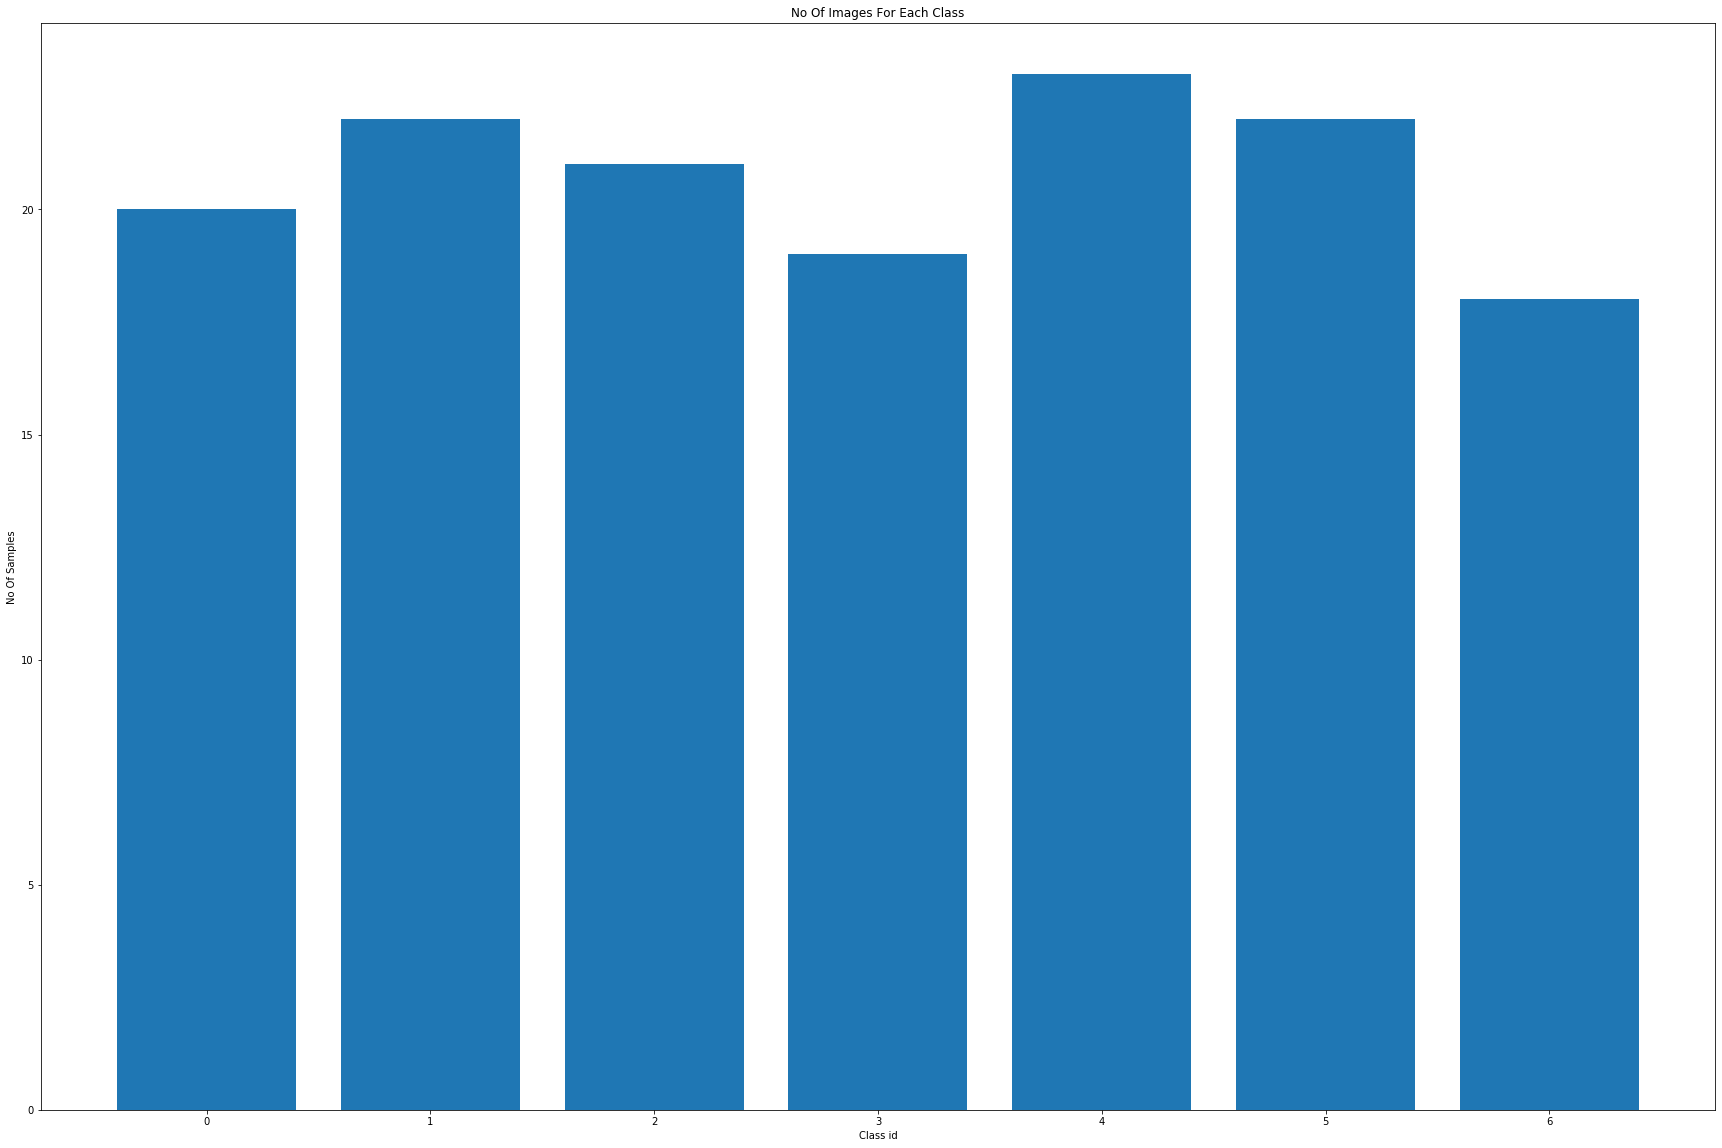

In [14]:
NO_OF_SAMPLES=[]
for i in labels:
    NO_OF_SAMPLES.append(len(np.where(Y_train==i)[0]))

    
    
plt.figure(figsize=(30,20))
plt.bar(labels,NO_OF_SAMPLES)
plt.title("No Of Images For Each Class")
plt.xlabel("Class id")
plt.ylabel("No Of Samples")
plt.show()

In [15]:
X_train=X_train/255
Y_train=Y_train/255

In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(width_shift_range=0.1,
                          height_shift_range=0.1,
                              zoom_range=0.2,
                          shear_range=0.1,
                           rotation_range=20)

Using TensorFlow backend.


In [17]:
datagen.fit(X_train)


In [18]:
from keras.utils.np_utils import to_categorical
noofclasses=len(FOLDERS)

In [19]:
Y_train=to_categorical(Y_train,num_classes=len(FOLDERS))
Y_test=to_categorical(Y_test,num_classes=len(FOLDERS))

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.normalization import BatchNormalization

from keras.layers import Dropout,Flatten,Dense
from keras.optimizers import SGD, Adam

In [43]:
def my_model1():
    model = Sequential()
    model.add(BatchNormalization(input_shape=(150,150,3)))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))
    return model

In [44]:
model = my_model1()
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [45]:
history = model.fit(X_train,Y_train,
          batch_size=50,
          epochs=5,
          validation_data=(X_test,Y_test))          

Train on 145 samples, validate on 37 samples
Epoch 1/5
145/145 [==============================] - 8s 55ms/step - loss: 1.0926 - accuracy: 0.7310 - val_loss: 2665.6296 - val_accuracy: 0.1622
Epoch 2/5
145/145 [==============================] - 5s 37ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2734.5054 - val_accuracy: 0.1622
Epoch 3/5
145/145 [==============================] - 6s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2804.8477 - val_accuracy: 0.1622
Epoch 4/5
145/145 [==============================] - 6s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2876.6677 - val_accuracy: 0.1622
Epoch 5/5
145/145 [==============================] - 5s 37ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2949.9341 - val_accuracy: 0.1622


Test Score 2949.934372360642
Test Accuracy 0.1621621549129486


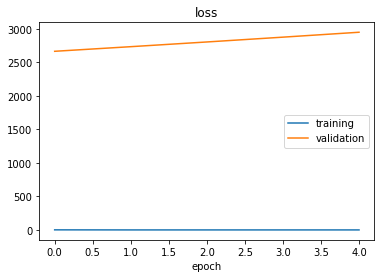

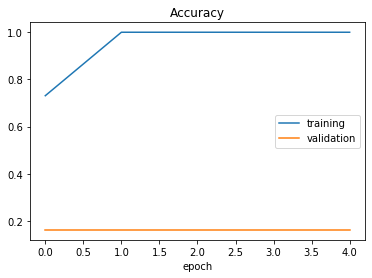

In [52]:
import tensorflow as tf
from keras.models import load_model
model.save(os.path.join("model.h5"))


plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

score=model.evaluate(X_test,Y_test,verbose=0)

print("Test Score {}".format(score[0]))
print("Test Accuracy {}".format(score[1]))

In [49]:
import numpy as np
from keras.preprocessing import image
import tensorflow as tf
from keras.models import load_model
import cv2
SAVE_PATH="C:/Users/Namrata/Color Recognition/"

In [53]:
model.save_weights("model.h5")
model.optimizer

In [55]:
imgOriginal=cv2.imread(r"C:\Users\Namrata\Downloads\Color Recognition\Dataset_test\Blue\1.png")
np.asarray(imgOriginal).shape

(150, 150, 3)

In [56]:
img=np.asarray(imgOriginal)
img=cv2.resize(img,(150,150))
img=cv2.resize(img,(150,150))
img=img.reshape(1,150,150,3)
classIndex=int(model.predict_classes(img))
predictions=model.predict(img)

In [57]:
probval=np.amax(predictions)
print(str(classIndex)+"  "+str(probval*100))
if probval>0.65:
    cv2.putText(imgOriginal,str(classIndex)+"  "+str(probval*100),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),1)
    
cv2.imshow("original Image",imgOriginal)

0  100.0
